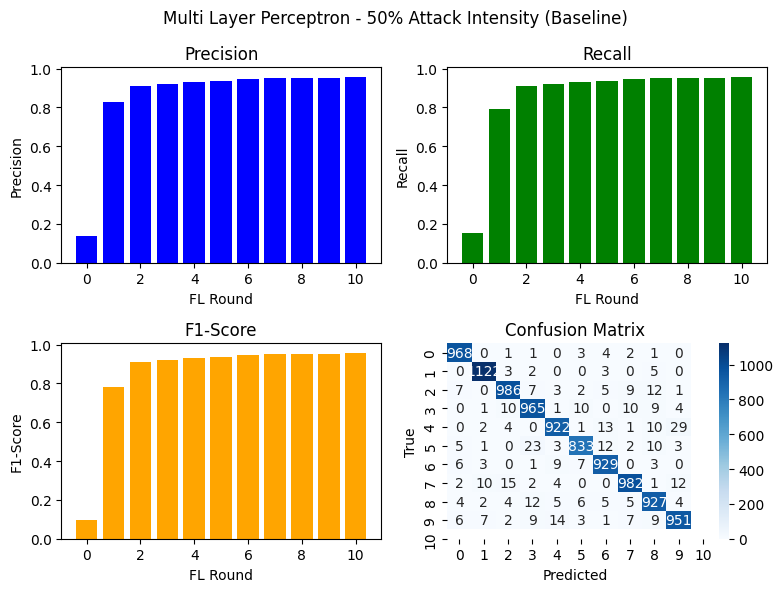

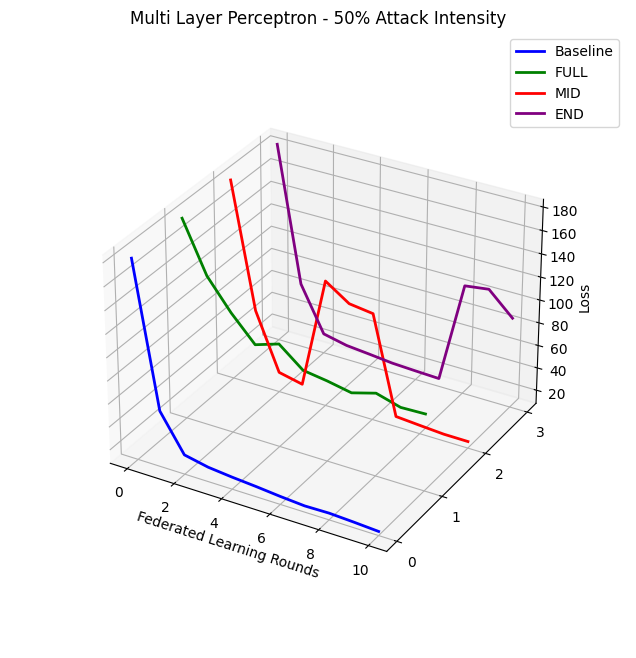

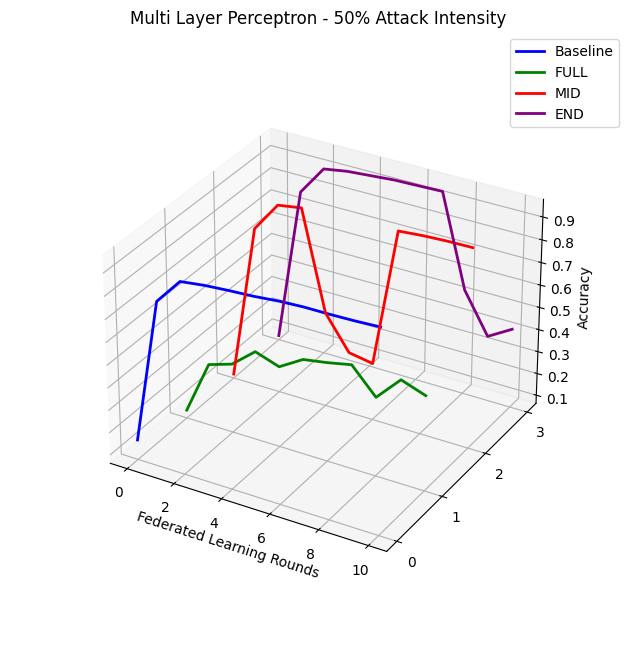

In [7]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns


def plot_2d(title: str, graph_type: str, baseline: list, full: list, mid: list, end: list):
    plt.title(title)
    rounds = [i for i in range(len(baseline))]
    plt.plot(rounds, baseline, label="Baseline")
    plt.plot(rounds, full, label="FULL")
    plt.plot(rounds, mid, label="MID")
    plt.plot(rounds, end, label="END")
    plt.xlabel("Federated Learning Rounds")
    plt.ylabel(graph_type)
    plt.legend()
    plt.show()


def plot_3d(title: str, graph_type: str, baseline: list, full: list, mid: list, end: list):
    # Assuming you have data in the following format:
    # rounds: List of federated learning rounds
    # baseline_accuracy: List of baseline accuracy values
    # full_100_accuracy: List of accuracy values for FULL attack with 100% label flipping
    # mid_50_accuracy: List of accuracy values for MID attack with 50% label flipping
    # end_30_accuracy: List of accuracy values for END attack with 30% label flipping

#     plt.clf()
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection='3d')
    rounds = [i for i in range(len(baseline))]

    # Plot baseline accuracy
    ax.plot(rounds, [0] * len(rounds), baseline,
            label='Baseline', color='blue', linewidth=2)

    # Plot FULL attack with 100% label flipping
    ax.plot(rounds, [1] * len(rounds), full,
            label='FULL', color='green', linewidth=2)

    # Plot MID attack with 50% label flipping
    ax.plot(rounds, [2] * len(rounds), mid,
            label='MID', color='red', linewidth=2)

    # Plot END attack with 30% label flipping
    ax.plot(rounds, [3] * len(rounds), end,
            label='END', color='purple', linewidth=2)

    # Set labels
    ax.set_xlabel('Federated Learning Rounds')
    # ax.set_ylabel('Label Flipping Intensity')
    ax.set_zlabel(graph_type, rotation=90)
    ax.set_yticks([0, 1, 2, 3])
    # ax.set_yticklabels(['Baseline', 'FULL', 'MID', 'END'])
    ax.set_title(title)

    # Adjust layout to make room for the z-axis label
    ax.set_box_aspect(aspect=None, zoom=0.8)

    # Add legend
    ax.legend()

    # Show the 3D plot
    plt.show()


def plot_other_metrics(title: str, metrics_centralized: dict):
    num_classes = len(metrics_centralized["precision"])
    precision_list = [metrics_centralized["precision"][i][1]
                      for i in range(num_classes)]
    recall_list = [metrics_centralized["recall"][i][1]
                   for i in range(num_classes)]
    f1_list = [metrics_centralized["f1"][i][1] for i in range(num_classes)]

    fig, axs = plt.subplots(2, 2, figsize=(8, 6))
    plt.suptitle(title)

    # Precision
    # plt.subplot(131)
    axs[0, 0].bar(range(num_classes), precision_list, color='blue')
    axs[0, 0].set_xlabel('FL Round')
    axs[0, 0].set_ylabel('Precision')
    axs[0, 0].set_title('Precision')

    # Recall 
    # plt.subplot(132)
    axs[0, 1].bar(range(num_classes), recall_list, color='green')
    axs[0, 1].set_xlabel('FL Round')
    axs[0, 1].set_ylabel('Recall')
    axs[0, 1].set_title('Recall')

    # F1
    # plt.subplot(133)
    axs[1, 0].bar(range(num_classes), f1_list, color='orange')
    axs[1, 0].set_xlabel('FL Round')
    axs[1, 0].set_ylabel('F1-Score')
    axs[1, 0].set_title('F1-Score')


    # TODO Confusion Matrix
    # plt.subplot(1)
    sns.heatmap(metrics_centralized['confusion_matrix'][-1][1],
                fmt="d", cmap="Blues", annot=True,
                xticklabels=range(num_classes),
                yticklabels=range(num_classes), ax=axs[1,1])
    axs[1, 1].set_title("Confusion Matrix")
    axs[1, 1].set_xlabel("Predicted")
    axs[1, 1].set_ylabel("True")

    plt.tight_layout()
    plt.show()



def plot_results(model: str, attack_ratio: int, plot_mode: str = '3d'):
    title_dict = {"MLP": "Multi Layer Perceptron",
                  "SCNN": "Simple Convolution Neural Network",
                  "LGR": "Logistic Regression"}

    plot_method = None
    if plot_mode == '2d':
        plot_method = plot_2d
    elif plot_mode == '3d':
        plot_method = plot_3d

    title = title_dict[model] + " - " + \
        str(attack_ratio) + "%" + " Attack Intensity"

    file = open("results/" + model + "_FULL_0.pkl", 'rb')
    baseline_result = pickle.load(file)
    file.close()
    baseline_loss = baseline_result['history'].losses_centralized
    baseline_accuracy = baseline_result['history'].metrics_centralized['accuracy']
    plot_other_metrics(title + " (Baseline)", baseline_result['history'].metrics_centralized)

    file = open("results/" + model + "_FULL_" +
                str(attack_ratio) + ".pkl", 'rb')
    full_mal = pickle.load(file)
    file.close()
    full_mal_loss = full_mal['history'].losses_centralized
    full_mal_accuracy = full_mal['history'].metrics_centralized['accuracy']
    plot_other_metrics(title + " (Full)", full_mal['history'].metrics_centralized)

    file = open("results/" + model + "_MID_" +
                str(attack_ratio) + ".pkl", 'rb')
    mid_mal = pickle.load(file)
    file.close()
    mid_mal_loss = mid_mal['history'].losses_centralized
    mid_mal_accuracy = mid_mal['history'].metrics_centralized['accuracy']
    plot_other_metrics(title + " (MID)", mid_mal['history'].metrics_centralized)

    file = open("results/" + model + "_END_" +
                str(attack_ratio) + ".pkl", 'rb')
    end_mal = pickle.load(file)
    file.close()
    end_mal_loss = end_mal['history'].losses_centralized
    end_mal_accuracy = end_mal['history'].metrics_centralized['accuracy']
    plot_other_metrics(title + " (END)", end_mal['history'].metrics_centralized)

    baseline_loss_list = [baseline_loss[i][1]
                          for i in range(len(baseline_loss))]
    full_mal_loss_list = [full_mal_loss[i][1]
                          for i in range(len(full_mal_loss))]
    mid_mal_loss_list = [mid_mal_loss[i][1] for i in range(len(mid_mal_loss))]
    end_mal_loss_list = [end_mal_loss[i][1] for i in range(len(end_mal_loss))]

    plot_method(title, "Loss", baseline_loss_list, full_mal_loss_list,
                mid_mal_loss_list, end_mal_loss_list)

    baseline_accuracy_list = [baseline_accuracy[i][1]
                              for i in range(len(baseline_accuracy))]
    full_mal_accuracy_list = [full_mal_accuracy[i][1]
                              for i in range(len(full_mal_accuracy))]
    mid_mal_accuracy_list = [mid_mal_accuracy[i][1]
                             for i in range(len(mid_mal_accuracy))]
    end_mal_accuracy_list = [end_mal_accuracy[i][1]
                             for i in range(len(end_mal_accuracy))]
    plot_method(title, "Accuracy", baseline_accuracy_list,
                full_mal_accuracy_list, mid_mal_accuracy_list, end_mal_accuracy_list)


plot_results("MLP", 50)